# Growth Mechanism with Details

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import colors

import sys
sys.path.append('../../src/')
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.viz.layout import imagemap, layout_fig, labelfigs
from m3_learning.RHEED.Dataset import RHEED_parameter_dataset, RHEED_spot_Dataset
from m3_learning.RHEED.Viz import Viz
from m3_learning.RHEED.Analysis import detect_peaks, analyze_curves, process_rheed_data 
from m3_learning.RHEED.Packed_functions import decay_curve_examples
from m3_learning.RHEED.Fit import NormalizeData

printing = printer(basepath = './Figures/3.Growth_mechanism/')
printing_plot = printer(basepath = './Figures/3.Growth_mechanism/', fileformats=['png'], dpi=1200)
if not os.path.isdir('./Data/Plume_results'): os.mkdir('./Data/Plume_results')
set_style("printing")

plot_size = (6, 2)
color_blue = (44/255,123/255,182/255)
color_gray = (128/255, 128/255, 128/255, 0.5)
seq_colors = ['#00429d','#2e59a8','#4771b2','#5d8abd','#73a2c6','#8abccf','#a5d5d8','#c5eddf','#ffffe0']
bgc1, bgc2 = (*colors.hex2color(seq_colors[0]), 0.3), (*colors.hex2color(seq_colors[5]), 0.3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn


## 1. Visualize the spots from collected data

In [2]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/STO_STO_test6_06292022-standard.h5'
D1_spot = RHEED_spot_Dataset(path, sample_name='treated_213nm')
D1_spot.data_info

Growth: background_with_heater, Size of data: f(2251, 300, 300)
Growth: background_without_heater, Size of data: f(2942, 300, 300)
Growth: growth_1, Size of data: f(13189, 300, 300)
Growth: growth_10, Size of data: f(12336, 300, 300)
Growth: growth_11, Size of data: f(12799, 300, 300)
Growth: growth_12, Size of data: f(12563, 300, 300)
Growth: growth_2, Size of data: f(12858, 300, 300)
Growth: growth_3, Size of data: f(11392, 300, 300)
Growth: growth_4, Size of data: f(13067, 300, 300)
Growth: growth_5, Size of data: f(12619, 300, 300)
Growth: growth_6, Size of data: f(12610, 300, 300)
Growth: growth_7, Size of data: f(12431, 300, 300)
Growth: growth_8, Size of data: f(12553, 300, 300)
Growth: growth_9, Size of data: f(12568, 300, 300)


In [3]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/STO_STO_test6_06292022-standard.h5'
D1_spot = RHEED_spot_Dataset(path, sample_name='treated_213nm')
D1_spot.data_info

path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/test6_gaussian_fit_parameters_all-04232023.h5'
D1_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='treated_213nm')
D1_para.data_info

Growth: background_with_heater, Size of data: f(2251, 300, 300)
Growth: background_without_heater, Size of data: f(2942, 300, 300)
Growth: growth_1, Size of data: f(13189, 300, 300)
Growth: growth_10, Size of data: f(12336, 300, 300)
Growth: growth_11, Size of data: f(12799, 300, 300)
Growth: growth_12, Size of data: f(12563, 300, 300)
Growth: growth_2, Size of data: f(12858, 300, 300)
Growth: growth_3, Size of data: f(11392, 300, 300)
Growth: growth_4, Size of data: f(13067, 300, 300)
Growth: growth_5, Size of data: f(12619, 300, 300)
Growth: growth_6, Size of data: f(12610, 300, 300)
Growth: growth_7, Size of data: f(12431, 300, 300)
Growth: growth_8, Size of data: f(12553, 300, 300)
Growth: growth_9, Size of data: f(12568, 300, 300)
Growth: background_with_heater:
--spot: spot_1:
----height:, Size of data: (2251,)
----img_max:, Size of data: (2251,)
----img_mean:, Size of data: (2251,)
----img_rec_max:, Size of data: (2251,)
----img_rec_mean:, Size of data: (2251,)
----img_rec_sum:,

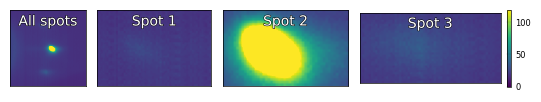

In [4]:
img_all = D1_spot.growth_dataset(growth='growth_2', index=0)
img_spot1 = D1_para.growth_dataset(growth='growth_2', metric='raw_image', spot='spot_1', index=100)
img_spot2 = D1_para.growth_dataset(growth='growth_2', metric='raw_image', spot='spot_2', index=100)
img_spot3 = D1_para.growth_dataset(growth='growth_2', metric='raw_image', spot='spot_3', index=100)

imgs = [img_all, img_spot1, img_spot2, img_spot3]
width_ratios = [img.shape[1]/img.shape[0] for img in imgs]
titles = ['All spots', 'Spot 1', 'Spot 2', 'Spot 3']
fig = plt.figure(figsize=(6.5, 1))
gs = gridspec.GridSpec(nrows=1, ncols=4, width_ratios=width_ratios, wspace=0.1)
axes = [fig.add_subplot(gs[i]) for i in range(4)]
for i, ax in enumerate(axes):
    if i == 3:
        imagemap(ax, imgs[i], colorbars=True, clim=(0,120), divider_=False)
    else:
        imagemap(ax, imgs[i], colorbars=False, clim=(0,120), divider_=False)
    labelfigs(ax, None, string_add=titles[i], loc='ct', size=10)
plt.show()

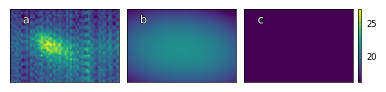

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_2 at index 10.
img_sum=47210.00, img_max=27.00, img_mean=19.67
img_rec_sum=47069.62, img_rec_max=21.57, img_rec_mean=19.61
height=21.57, x=22.41, y=30.54, width_x=34.65, width_y_max=65.43


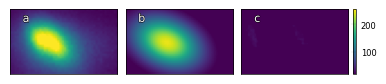

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_2 at index 10.
img_sum=120347.00, img_max=255.00, img_mean=86.46
img_rec_sum=107956.04, img_rec_max=247.07, img_rec_mean=77.55
height=247.70, x=16.68, y=21.86, width_x=7.42, width_y_max=11.00


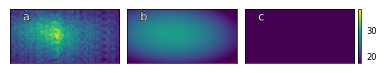

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_2 at index 10.
img_sum=48979.00, img_max=38.00, img_mean=23.55
img_rec_sum=48411.60, img_rec_max=28.72, img_rec_mean=23.27
height=28.73, x=14.61, y=26.34, width_x=20.42, width_y_max=42.69


In [5]:
D1_para.viz_RHEED_parameter(growth='growth_2', spot='spot_1', index=10)
D1_para.viz_RHEED_parameter(growth='growth_2', spot='spot_2', index=10)
D1_para.viz_RHEED_parameter(growth='growth_2', spot='spot_3', index=10)

## 2. Examples of Fitted RHEED Intenstity Curve

In [6]:
spot = 'spot_2'
metric = 'img_sum'
camera_freq = 500
fit_settings = {'savgol_window_order': (15, 3), 'pca_component': 10, 'I_diff': 15000, 'unify':False, 
                'bounds':[0.001, 1], 'p_init':[0.1, 0.4, 0.1]}

In [7]:
x_all, y_all = D1_para.load_multiple_curves(['growth_1'], spot, metric, x_start=0, interval=0)

parameters_all, x_coor_all, info = analyze_curves(D1_para, {'growth_1': 1}, spot, metric, interval=0, fit_settings=fit_settings)
[xs_all, ys_all, ys_fit_all, ys_nor_all, ys_nor_fit_all, ys_nor_fit_failed_all, labels_all, losses_all] = info

../Figures/3.Growth_mechanism/treated_81nm-curve_examples.png
../Figures/3.Growth_mechanism/treated_81nm-curve_examples.svg


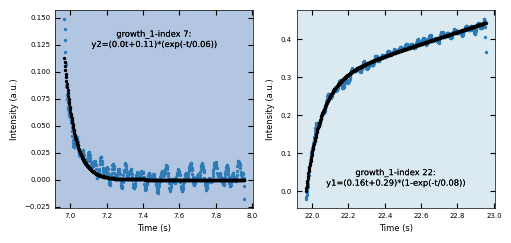

In [8]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/test6_gaussian_fit_parameters_all-04232023.h5'
D1_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='treated_213nm')
decay_curve_examples(D1_para, 'spot_2', 'img_sum', fit_settings)
printing.savefig(fig, 'treated_81nm-curve_examples')

## 3. Predict the growth mechanism

### 3.1 Sample 1 - treated_213nm

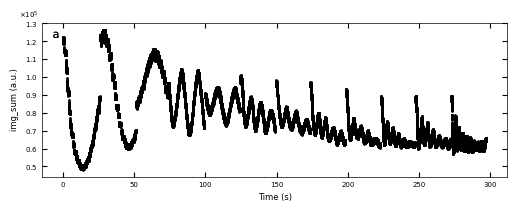

Gaussian fitted parameters in time: Fig. a: sum of original image, b: sum of reconstructed image, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [9]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/test6_gaussian_fit_parameters_all-04232023.h5'
D1_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='treated_213nm')

growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 
               'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
D1_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', metric_list=['img_sum'], head_tail=(100,300), interval=200)

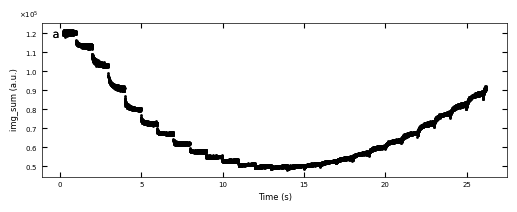

Gaussian fitted parameters in time: Fig. a: sum of original image, b: sum of reconstructed image, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [10]:
D1_para.viz_RHEED_parameter_trend(['growth_1'], spot='spot_2', metric_list=['img_sum'])

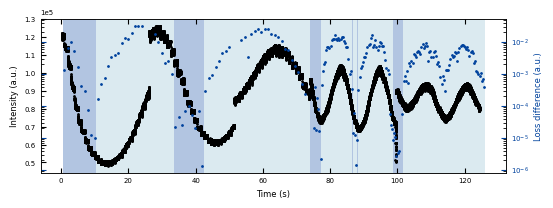

In [11]:
growth_dict = {'growth_1':1, 'growth_2':1, 'growth_3':1, 'growth_4':3, 'growth_5':3}
x_all, y_all = D1_para.load_multiple_curves(growth_dict.keys(), spot, metric, x_start=0, interval=0)

parameters_all, x_coor_all, info = analyze_curves(D1_para, growth_dict, spot, metric, interval=0, fit_settings=fit_settings)
[xs_all, ys_all, ys_fit_all, ys_nor_all, ys_nor_fit_all, ys_nor_fit_failed_all, labels_all, losses_all] = info
x_y1 = x_coor_all[losses_all[:,0]>losses_all[:,1]]
x_y2 = x_coor_all[losses_all[:,0]<losses_all[:,1]]
color_array = Viz.two_color_array(x_coor_all, x_y1, x_y2, bgc1, bgc2)
color_array = np.concatenate([np.expand_dims(x_coor_all, 1), color_array], axis=1)
loss_diff = np.abs(losses_all[:,0] - losses_all[:,1])

fig, ax = plt.subplots(1, 1, figsize=(6, 2))
Viz.plot_loss_difference(ax, x_all, y_all, x_coor_all, loss_diff, color_array, color_2=seq_colors[0])
# Viz.plot_loss_difference(ax, x_all, y_all, x_coor_all, loss_diff, color_array, color_2=seq_colors[0])

We used two exponential decay functions ( y=1-exp(t/tau) and y=exp(-t/tau) ) to fit with RHEED intensity curves. By calculate the Mean Squared Error (MSE) loss of fitted data and raw data, we can determine which function fits better by use the fitting function with a lower MSE loss. Here we plotted two diagrams: 1. RHEED intensity curve with two colors as the background to indicate the selected fitted functions (left y axis); 2. MSE loss difference between raw data and fitted data (right y axis).

#### 3.1.1 Check Prediction Outliers

If the difference between MSE losses of two fitting functions with raw data is small, it's hard to determine fitting function based on the loss. Therefore, we need to review these examples to exclude the incorrect prediction. Here are curves with a small loss difference.

Indices: [ 38 105  73 141 142 143 106 138   9 140   8 104 139 102  72  69 137  67
  36  30  32 136  31  35 135 144 103  37  33   7  71  34  10  70  66  39
 182   6 107 101 217  68   5  74  11 179  65 149 145 147]


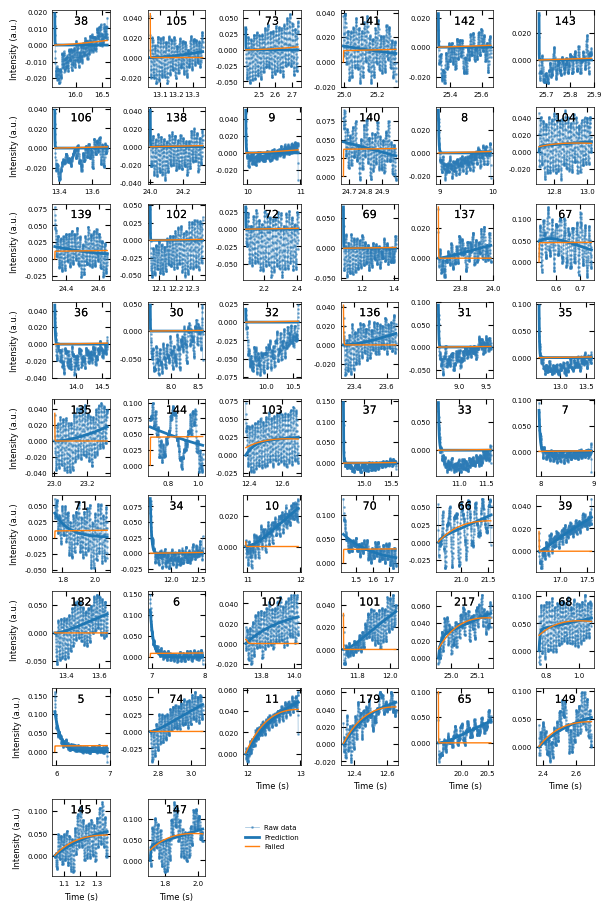

In [12]:
 # get the most confused 50 curve
confused_index = np.argsort(loss_diff)[:50]
# confused_index = np.sort(confused_index)
print("Indices:", confused_index)

xs_confused = xs_all[confused_index]
ys_nor_confused = ys_nor_all[confused_index]
ys_nor_fit_confused = ys_nor_fit_all[confused_index]
ys_nor_fit_failed_confused = ys_nor_fit_failed_all[confused_index]
# labels_confused = list(str(i)+'-'+labels_all[i] for i in confused_index)
Viz.plot_fit_details(xs_confused, ys_nor_confused, ys_nor_fit_confused, ys_nor_fit_failed_confused, confused_index)

Based on the observation, there are three situations for these curves with small loss difference:
1. Correct prediction: acceptable. Indexes: 5, 6, 7, 8, 9, 11, 33, 34, 35, 36, 37.
2. Incorrect predictions: exclude these predictions in final results. There is no curve in this situation.
3. Flat curves when the sample transits from one terminated surface to another kind, so we should exclude these predictions as well.
We will remove the predictions that are not in situation 1.

#### 3.1.2 Remove Incorrect Predictions

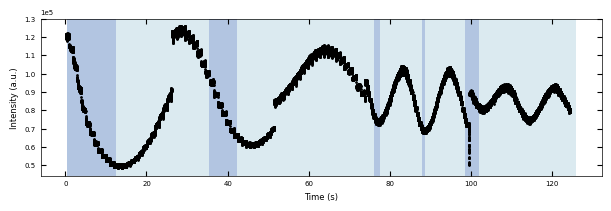

In [13]:
# replace the wrong prediction with result from previous ablation
wrong_prediction_list = confused_index
wrong_prediction_list = np.delete(wrong_prediction_list, [5, 6, 7, 8, 9, 11, 33, 34, 35, 36, 37])
# wrong_prediction_list = [8, 37, 36, 32, 68, 38, 34, 7, 35, 72, 6, 5]
for i in wrong_prediction_list:
    color_array[i][1:] = color_array[i-1][1:]
    
fig, ax = plt.subplots(1, 1, figsize=(6, 2), layout='compressed')
Viz.draw_background_colors(ax, color_array)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

#### 3.1.3 Label the Condition Change

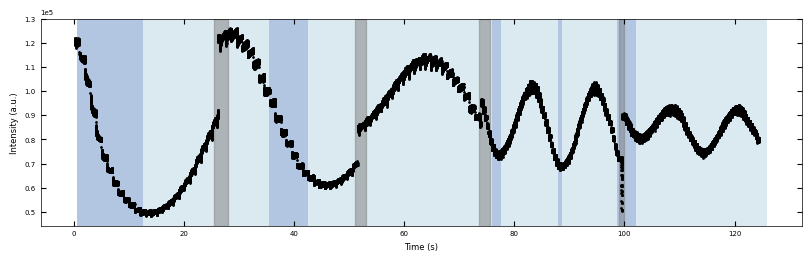

In [14]:
boxes = [(25.5, 28), (51, 53), (73.5, 75.5), (99, 100)]
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.draw_background_colors(ax, color_array)
Viz.draw_boxes(ax, boxes, color_gray)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

#### 3.1.4 Clean plot

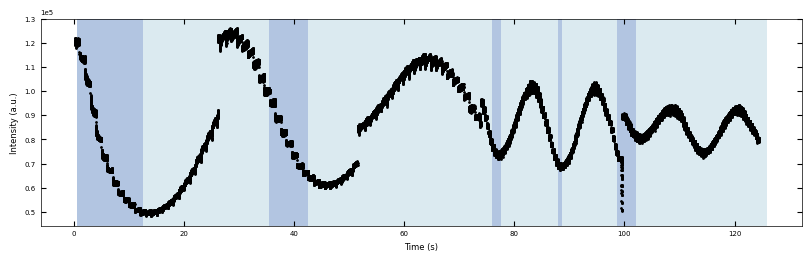

In [15]:
for (box_start, box_end) in boxes:
    for i, x in enumerate(color_array[:,0]):
        if x>box_start and x<box_end:
            color_array[i][1:] = color_array[i-1][1:]

fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.draw_background_colors(ax, color_array)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

In [16]:
np.save('../Data/Plume_results/treated_213nm-x_all.npy', np.copy(x_all))
np.save('../Data/Plume_results/treated_213nm-y_all.npy', np.copy(y_all))
np.save('../Data/Plume_results/treated_213nm-bg_growth.npy', np.copy(color_array))
np.save('../Data/Plume_results/treated_213nm-boxes.npy', np.copy(boxes))
np.save('../Data/Plume_results/treated_213nm-losses_all.npy', np.copy(losses_all))

### 3.2 Sample 2 - treated_81nm

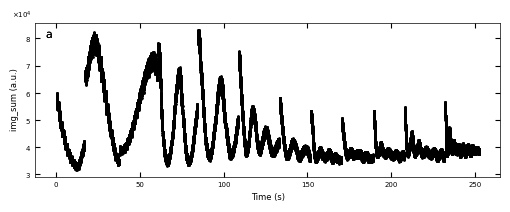

Gaussian fitted parameters in time: Fig. a: sum of original image, b: sum of reconstructed image, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [17]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/test7_gaussian_fit_parameters_all-04232023.h5'
D2_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='treated_81nm')

growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 
               'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
D2_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', metric_list=['img_sum'], head_tail=(100,300), interval=200)

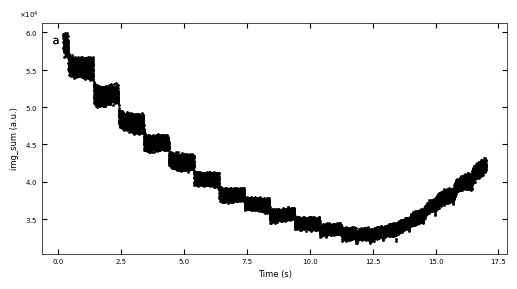

Gaussian fitted parameters in time: Fig. a: sum of original image, b: sum of reconstructed image, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [18]:
D2_para.viz_RHEED_parameter_trend(['growth_1'], spot='spot_2', metric_list=['img_sum'], figsize=(6,3))

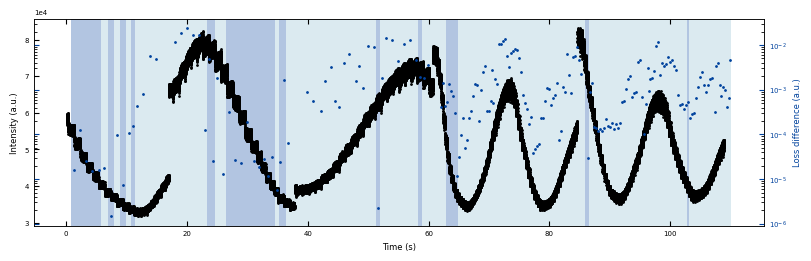

In [19]:
growth_dict = {'growth_1':1, 'growth_2':1, 'growth_3':1, 'growth_4':3, 'growth_5':3}
x_all, y_all = D2_para.load_multiple_curves(growth_dict.keys(), spot, metric, x_start=0, interval=0)

parameters_all, x_coor_all, info = analyze_curves(D2_para, growth_dict, spot, metric, interval=0, fit_settings=fit_settings)
[xs_all, ys_all, ys_fit_all, ys_nor_all, ys_nor_fit_all, ys_nor_fit_failed_all, labels_all, losses_all] = info
x_y1 = x_coor_all[losses_all[:,0]>losses_all[:,1]]
x_y2 = x_coor_all[losses_all[:,0]<losses_all[:,1]]
color_array = Viz.two_color_array(x_coor_all, x_y1, x_y2, bgc1, bgc2, transparency=0.5)
color_array = np.concatenate([np.expand_dims(x_coor_all, 1), color_array], axis=1)
loss_diff = np.abs(losses_all[:,0] - losses_all[:,1])

fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.plot_loss_difference(ax, x_all, y_all, x_coor_all, loss_diff, color_array, color_2=seq_colors[0])

#### 3.2.1 Check Prediction Outliers

Indices: [  0   1   2   3   4   5   6   7   8   9  10  20  22  24  26  27  29  30
  31  32  33  34  35  37  52  71  72  73  75  76 108 110 111 112 113 123
 124 135 138 139 140 141 142 143 145 146 148 149 150 163]


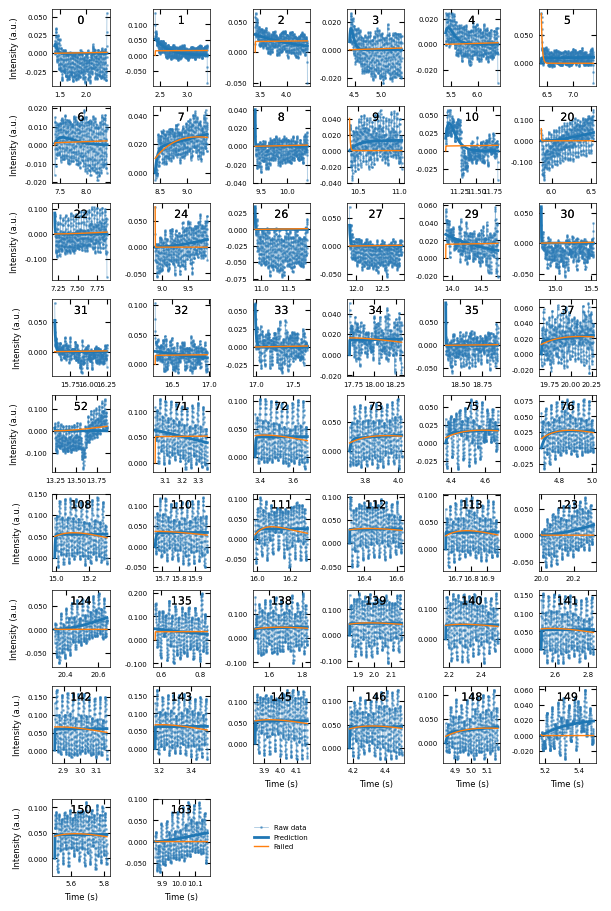

In [20]:
# get the most confused 50 curve
confused_index = np.argsort(loss_diff)[:50]
confused_index.sort()
print("Indices:", confused_index)

xs_confused = xs_all[confused_index]
ys_nor_confused = ys_nor_all[confused_index]
ys_nor_fit_confused = ys_nor_fit_all[confused_index]
ys_nor_fit_failed_confused = ys_nor_fit_failed_all[confused_index]
labels_confused = list(str(i)+'-'+labels_all[i] for i in confused_index)

Viz.plot_fit_details(xs_confused, ys_nor_confused, ys_nor_fit_confused, ys_nor_fit_failed_confused, confused_index)

1. Correct prediction: acceptable. Indexes: 1, 2, 3, 4, 7, 8, 9, 26, 27, 30, 31, 33, 35.
2. Incorrect predictions: exclude these predictions in final results. There is no curve in this situation.
3. Flat curves when the sample transits from one terminated surface to another kind, so we should exclude these predictions as well.
We will remove the predictions that are not in situation 1.

#### 3.2.2 Remove Incorrect Predictions

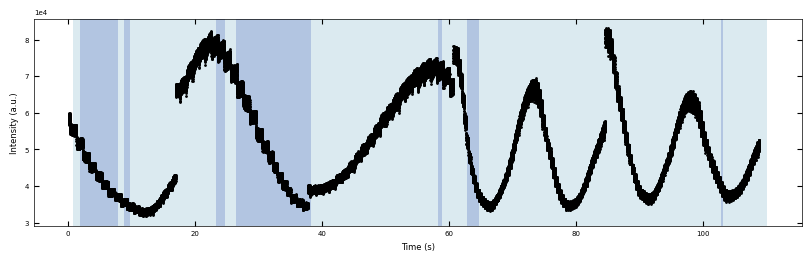

In [21]:
# replace the wrong prediction with results from previous ablation
wrong_prediction_list = confused_index
wrong_prediction_list = np.delete(wrong_prediction_list, [1, 2, 3, 4, 7, 8, 9, 26, 27, 30, 31, 33, 35])
for i in wrong_prediction_list:
    color_array[i][1:] = color_array[i-1][1:]
    
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.draw_background_colors(ax, color_array)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

#### 3.2.3 Label the Condition Change

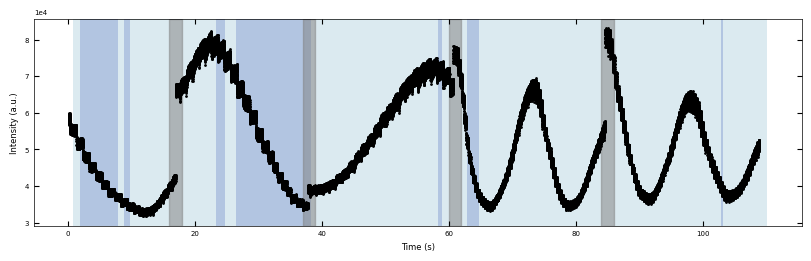

In [22]:
boxes = [(16, 18), (37, 39), (60, 62), (84, 86)]
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.draw_background_colors(ax, color_array)
Viz.draw_boxes(ax, boxes, color_gray)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

#### 3.2.4 Clean plot

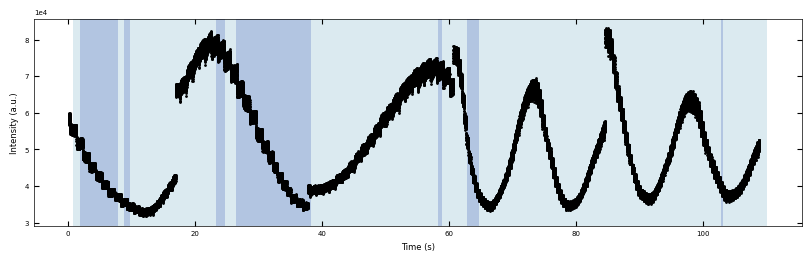

In [23]:
for (box_start, box_end) in boxes:
    for i, x in enumerate(color_array[:,0]):
        if x>box_start and x<box_end:
            color_array[i][1:] = color_array[i-1][1:]
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.draw_background_colors(ax, color_array)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

#### Conclusion: 
The model can predict most of the "decay flipping phenomenon". However, it missed the one at around t=75s. We can see the decrease decay function feature is harder to obeserve and predict after a few unit cell have been grown.

By observing the fitted examples, we can derive similar conclusion as the previous growth. Because in later growth, the reason of decay function y=exp(-t/tau) have lower MSE loss is mainly resulted from the general intensity change and noise instead of inherent decay drop phenomenon, we can assume the curve after growth_3 fit better with y=1-exp(-t/tau) decay function. 

In [24]:
np.save('../Data/Plume_results/treated_81nm-x_all.npy', np.copy(x_all))
np.save('../Data/Plume_results/treated_81nm-y_all.npy', np.copy(y_all))
np.save('../Data/Plume_results/treated_81nm-bg_growth.npy', np.copy(color_array))
np.save('../Data/Plume_results/treated_81nm-boxes.npy', np.copy(boxes))
np.save('../Data/Plume_results/treated_81nm-losses_all.npy', np.copy(losses_all))

### 3.3 Sample 3 - untreated_162nm

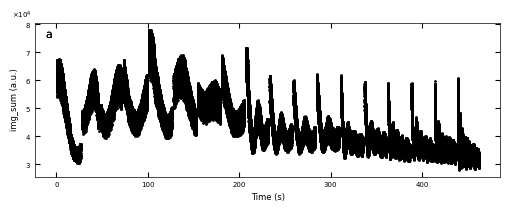

Gaussian fitted parameters in time: Fig. a: sum of original image, b: sum of reconstructed image, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [25]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/test9_gaussian_fit_parameters_all-04232023.h5'
D3_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='untreated_162nm')

growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 
               'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12',
               'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18']
D3_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', metric_list=['img_sum'], head_tail=(100,300), interval=1000)

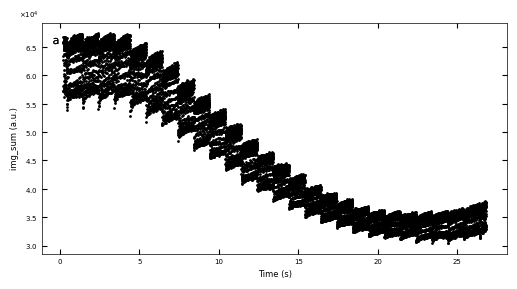

Gaussian fitted parameters in time: Fig. a: sum of original image, b: sum of reconstructed image, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [26]:
D3_para.viz_RHEED_parameter_trend(['growth_1'], spot='spot_2', metric_list=['img_sum'], figsize=(6,3))

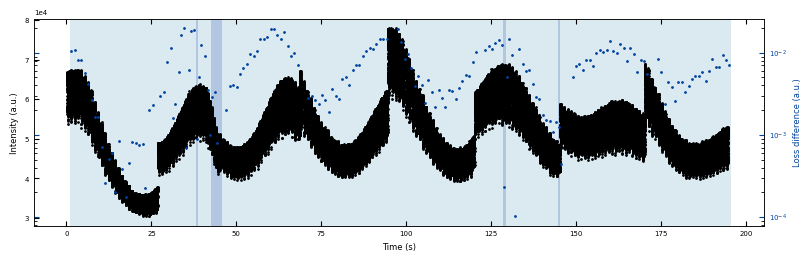

In [27]:
growth_dict = {'growth_1':1, 'growth_2':1, 'growth_3':1, 'growth_4':1, 'growth_5':1, 'growth_6':1, 'growth_7':1, 'growth_8':1}
x_all, y_all = D3_para.load_multiple_curves(growth_dict.keys(), spot, metric, x_start=0, interval=0)

parameters_all, x_coor_all, info = analyze_curves(D3_para, growth_dict, spot, metric, interval=0, fit_settings=fit_settings)
[xs_all, ys_all, ys_fit_all, ys_nor_all, ys_nor_fit_all, ys_nor_fit_failed_all, labels_all, losses_all] = info
x_y1 = x_coor_all[losses_all[:,0]>losses_all[:,1]]
x_y2 = x_coor_all[losses_all[:,0]<losses_all[:,1]]
color_array = Viz.two_color_array(x_coor_all, x_y1, x_y2, bgc1, bgc2, transparency=0.5)
color_array = np.concatenate([np.expand_dims(x_coor_all, 1), color_array], axis=1)
loss_diff = np.abs(losses_all[:,0] - losses_all[:,1])

fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.plot_loss_difference(ax, x_all, y_all, x_coor_all, loss_diff, color_array, color_2=seq_colors[0])

#### 3.3.1 Check Prediction Outliers

Indices: [  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  29  30  34  38  43  44  46  47  69  71  72  74  75  78 101 104 106
 107 110 123 127 134 135 136 137 138 139 140 141 167 170]


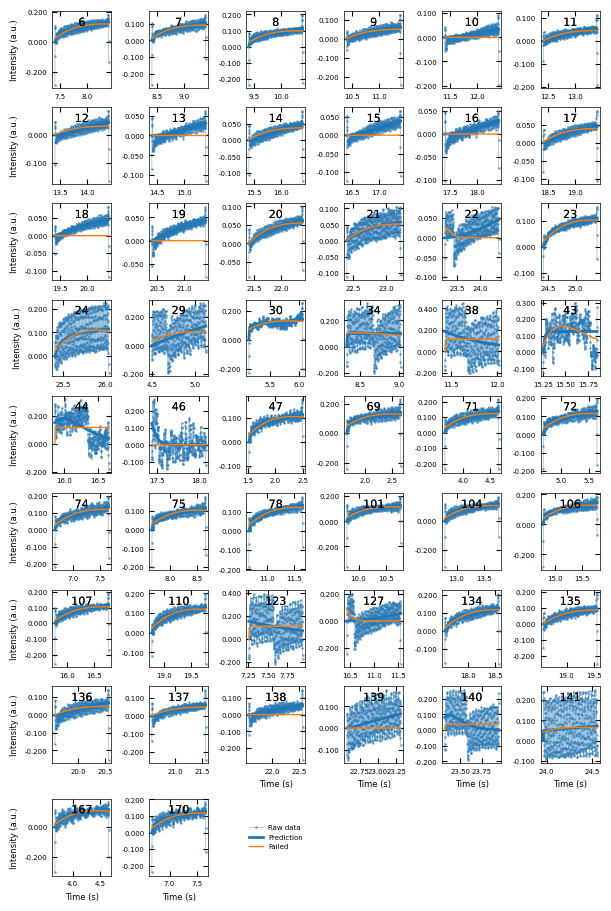

In [28]:
# get the most confused 50 curve
confused_index = np.argsort(loss_diff)[:50]
confused_index = np.sort(confused_index)
print("Indices:", confused_index)

xs_confused = xs_all[confused_index]
ys_nor_confused = ys_nor_all[confused_index]
ys_nor_fit_confused = ys_nor_fit_all[confused_index]
ys_nor_fit_failed_confused = ys_nor_fit_failed_all[confused_index]
Viz.plot_fit_details(xs_confused, ys_nor_confused, ys_nor_fit_confused, ys_nor_fit_failed_confused, confused_index)

1. Correct prediction: acceptable. Indexes: 1, 2, 3, 4, 7, 8, 9, 26, 27, 30, 31, 33, 35.
2. Incorrect predictions: exclude these predictions in final results. There is no curve in this situation.
3. Flat curves when the sample transits from one terminated surface to another kind, so we should exclude these predictions as well.
We will remove the predictions that are not in situation 1.

#### 3.3.2 Remove Incorrect Predictions

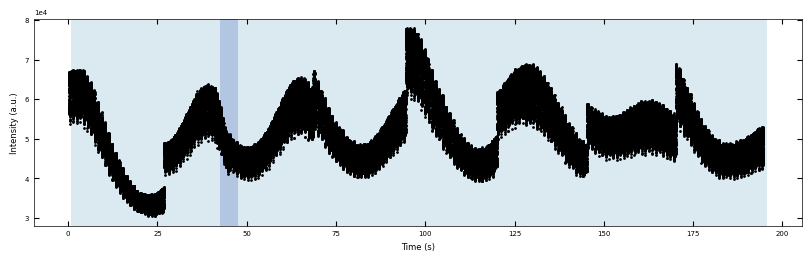

In [29]:
# replace the wrong prediction with result from previous ablation
wrong_prediction_list = confused_index
wrong_prediction_list = np.delete(wrong_prediction_list, [6, 7, 8, 9, 12, 17, 23, 24])
for i in wrong_prediction_list:
    color_array[i][1:] = color_array[i-1][1:]
    
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.draw_background_colors(ax, color_array)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

We notice the predictions around index=45 are not consistent with our assumption, so we review some curves here:

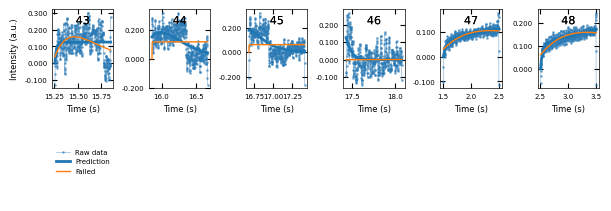

In [30]:
wrong_prediction_list = [43, 44, 45, 46, 47, 48]
xs_confused = xs_all[wrong_prediction_list]
ys_nor_confused = ys_nor_all[wrong_prediction_list]
ys_nor_fit_confused = ys_nor_fit_all[wrong_prediction_list]
ys_nor_fit_failed_confused = ys_nor_fit_failed_all[wrong_prediction_list]
Viz.plot_fit_details(xs_confused, ys_nor_confused, ys_nor_fit_confused, ys_nor_fit_failed_confused, wrong_prediction_list)

In [31]:
for i in wrong_prediction_list:
    print(i, labels_all[i])

43 growth_2-index 19:
y1=(0.0t+0.12)*(1-exp(-t/0.03))
44 growth_2-index 20:
y2=(1.0t+0.15)*(exp(-t/0.3))
45 growth_2-index 21:
y2=(1.0t+0.18)*(exp(-t/0.18))
46 growth_2-index 22:
y2=(1.0t+0.13)*(exp(-t/0.06))
47 growth_3-index 1:
y1=(0.04t+0.07)*(1-exp(-t/0.06))
48 growth_3-index 2:
y1=(0.06t+0.11)*(1-exp(-t/0.04))


Remove index 44, 45, 46 because they are not a complete decay curve:

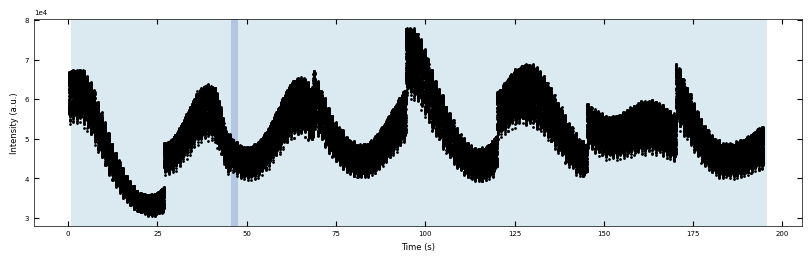

In [32]:
# replace the wrong prediction with result from previous ablation
wrong_prediction_list = [44, 45, 46]
for i in wrong_prediction_list:
    color_array[i][1:] = color_array[i-1][1:]
    
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.draw_background_colors(ax, color_array)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

#### 3.3.3 Label the Condition Change

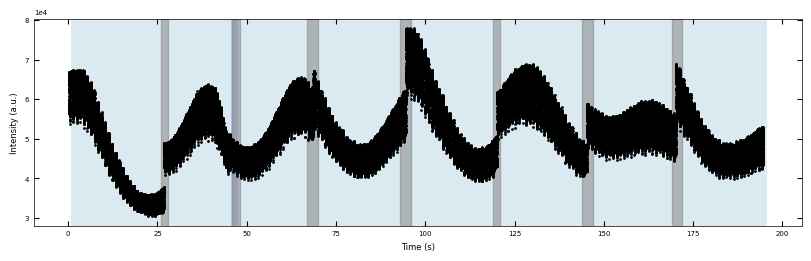

In [33]:
boxes = [(26, 28), (46, 48), (67, 70), (93, 96), (119, 121), (144, 147), (169, 172)]
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.draw_background_colors(ax, color_array)
Viz.draw_boxes(ax, boxes, color_gray)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

#### 3.3.4 Clean plot

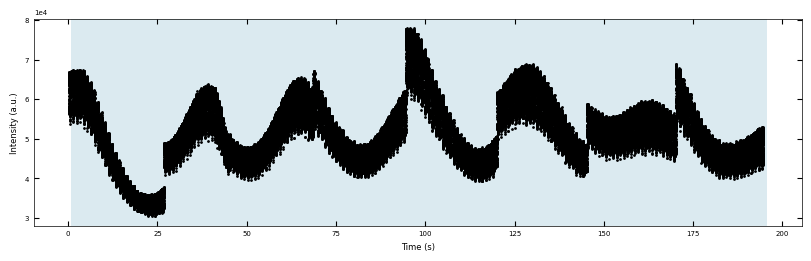

In [34]:
for (box_start, box_end) in boxes:
    for i, x in enumerate(color_array[:,0]):
        if x>box_start and x<box_end:
            color_array[i][1:] = color_array[i-1][1:]
            
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5), layout='compressed')
Viz.draw_background_colors(ax, color_array)
ax.scatter(x_all, y_all, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)')
plt.show()

In [ ]:
np.save('../Data/Plume_results/untreated_162nm-x_all.npy', np.copy(x_all))
np.save('../Data/Plume_results/untreated_162nm-y_all.npy', np.copy(y_all))
np.save('../Data/Plume_results/untreated_162nm-bg_growth.npy', np.copy(color_array))
np.save('../Data/Plume_results/untreated_162nm-boxes.npy', np.copy(boxes))
np.save('../Data/Plume_results/untreated_162nm-losses_all.npy', np.copy(losses_all))

All of the examples classified to y=exp(-t/tau) decay function are resulted from noise instead of from actual decay behavior. Therefore, we can conclude that the untreated does not shows "decay flipping phenomenon". 

## 4. Summary - Comparison between Three Samples

In [6]:
# load data if needed
x_all_sample1, y_all_sample1 = np.load('./Data/Plume_results/treated_213nm-x_all.npy'), np.load('./Data/Plume_results/treated_213nm-y_all.npy')
color_array_sample1 = np.load('./Data/Plume_results/treated_213nm-bg_growth.npy')
boxes_sample1 = np.load('./Data/Plume_results/treated_213nm-boxes.npy')
losses_all_sample1 = np.load('./Data/Plume_results/treated_213nm-losses_all.npy')
loss_diff_sample1 = np.abs(losses_all_sample1[:,0] - losses_all_sample1[:,1])

x_all_sample2, y_all_sample2 = np.load('./Data/Plume_results/treated_81nm-x_all.npy'), np.load('./Data/Plume_results/treated_81nm-y_all.npy')
color_array_sample2 = np.load('./Data/Plume_results/treated_81nm-bg_growth.npy')
boxes_sample2 = np.load('./Data/Plume_results/treated_81nm-boxes.npy')
losses_all_sample2 = np.load('./Data/Plume_results/treated_81nm-losses_all.npy')
loss_diff_sample2 = np.abs(losses_all_sample2[:,0] - losses_all_sample2[:,1])

x_all_sample3, y_all_sample3 = np.load('./Data/Plume_results/untreated_162nm-x_all.npy'), np.load('./Data/Plume_results/untreated_162nm-y_all.npy')
color_array_sample3 = np.load('./Data/Plume_results/untreated_162nm-bg_growth.npy')
boxes_sample3 = np.load('./Data/Plume_results/untreated_162nm-boxes.npy')
losses_all_sample3 = np.load('./Data/Plume_results/untreated_162nm-losses_all.npy')
loss_diff_sample3 = np.abs(losses_all_sample3[:,0] - losses_all_sample3[:,1])

### 4.1 RHEED Intensity with Loss Difference

./Figures/3.Growth_mechanism/loss_difference.png


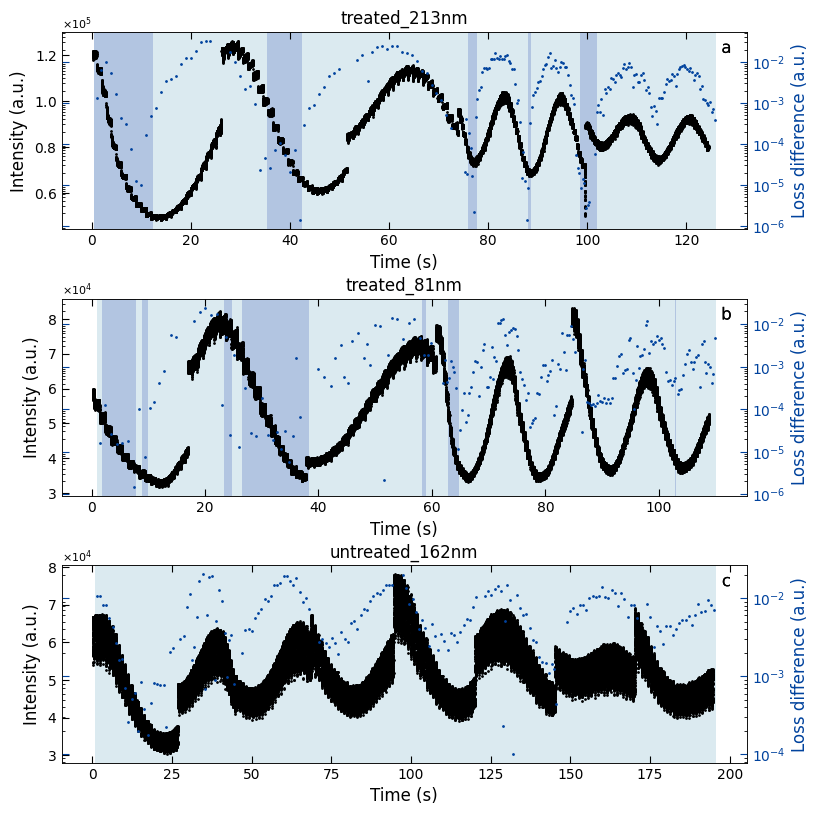

In [7]:
fig, axes = layout_fig(3, 1, figsize=(8, 8))
Viz.plot_loss_difference(axes[0], x_all_sample1, y_all_sample1, color_array_sample1[:,0], loss_diff_sample1, 
                         color_array_sample1, color_2=seq_colors[0], title='treated_213nm')
labelfigs(axes[0], number=0, loc='tr', style='b', size=12, inset_fraction=(0.08, 0.03))
Viz.plot_loss_difference(axes[1], x_all_sample2, y_all_sample2, color_array_sample2[:,0], loss_diff_sample2, 
                         color_array_sample2, color_2=seq_colors[0], title='treated_81nm')
labelfigs(axes[1], number=1, loc='tr', style='b', size=12, inset_fraction=(0.08, 0.03))
Viz.plot_loss_difference(axes[2], x_all_sample3, y_all_sample3, color_array_sample3[:,0], loss_diff_sample3, 
                         color_array_sample3, color_2=seq_colors[0], title='untreated_162nm')
labelfigs(axes[2], number=2, loc='tr', style='b', size=12, inset_fraction=(0.08, 0.03))
printing_plot.savefig(fig, 'loss_difference', dpi=300)
plt.show()

Temporal evolution of RHEED intensity extracted from spot 2 region. RHEED intensity of deposition of a) treated_213nm, b) treated_81nm, and c) untreated_162nm, respectively. The medium and light background represents different fitting functions used to fit with the decay curves. Typical decay curves are provided on the corresponding background color. And the blue scatter plot represents the loss difference between predictions using two exponential curve functions and raw RHEED intensity data. Higher loss difference means the model predict with less confidence. 

### 4.2 Plot with gray box covering the growth condition changing region

./Figures/3.Growth_mechanism/fitting_results-gray_boxes-a.png


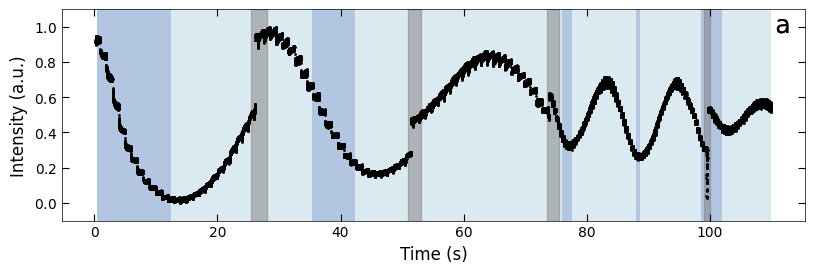

./Figures/3.Growth_mechanism/fitting_results-gray_boxes-b.png


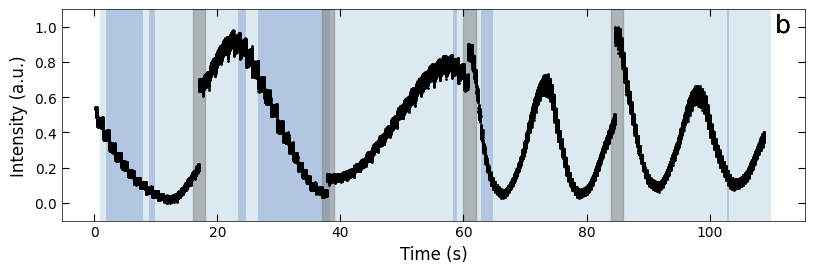

./Figures/3.Growth_mechanism/fitting_results-gray_boxes-c.png


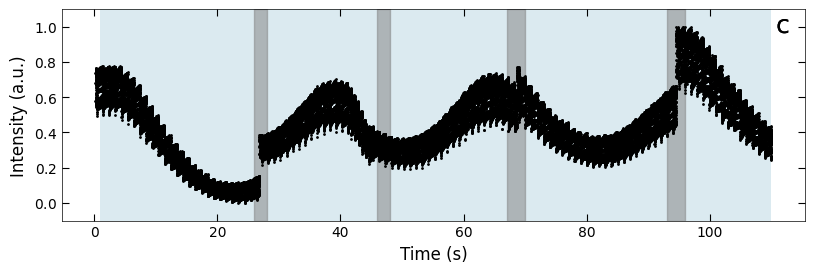

In [ ]:
y_all_sample1 = y_all_sample1[x_all_sample1<110]
x_all_sample1 = x_all_sample1[x_all_sample1<110]

color_array_sample1 = color_array_sample1[color_array_sample1[:, 0]<110]
boxes_sample1 = boxes_sample1[boxes_sample1[:,0]<110]

y_all_sample2 = y_all_sample2[x_all_sample2<110]
x_all_sample2 = x_all_sample2[x_all_sample2<110]

color_array_sample2 = color_array_sample2[color_array_sample2[:, 0]<110]
boxes_sample2 = boxes_sample2[boxes_sample2[:,0]<110]

y_all_sample3 = y_all_sample3[x_all_sample3<110]
x_all_sample3 = x_all_sample3[x_all_sample3<110]

color_array_sample3 = color_array_sample3[color_array_sample3[:, 0]<110]
boxes_sample3 = boxes_sample3[boxes_sample3[:,0]<110]

fig, ax = layout_fig(1, 1, figsize=(8, 2.6))
Viz.draw_background_colors(ax, color_array_sample1)
Viz.draw_boxes(ax, boxes_sample1, color_gray)

# Normalize the data
y_all_sample1 = NormalizeData(y_all_sample1, lb=np.min(y_all_sample1), ub=np.max(y_all_sample1))

ax.scatter(x_all_sample1, y_all_sample1, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)', ylim=(-0.1, 1.1), yaxis_style='sci')
labelfigs(ax, number=0, loc='tr', style='b', size=18, inset_fraction=(0.08, 0.03))
printing_plot.savefig(fig, 'fitting_results-gray_boxes-a', dpi=600, transparent=True)
plt.show()

fig, ax = layout_fig(1, 1, figsize=(8, 2.6))
Viz.draw_background_colors(ax, color_array_sample2)
Viz.draw_boxes(ax, boxes_sample2, color_gray)

# Normalize the data
y_all_sample2 = NormalizeData(y_all_sample2, lb=np.min(y_all_sample2), ub=np.max(y_all_sample2))

ax.scatter(x_all_sample2, y_all_sample2, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)', ylim=(-0.1, 1.1), yaxis_style='sci')
labelfigs(ax, number=1, loc='tr', style='b', size=18, inset_fraction=(0.08, 0.03))
printing_plot.savefig(fig, 'fitting_results-gray_boxes-b', dpi=600, transparent=True)
plt.show()

fig, ax = layout_fig(1, 1, figsize=(8, 2.6))
Viz.draw_background_colors(ax, color_array_sample3)
Viz.draw_boxes(ax, boxes_sample3, color_gray)

# Normalize the data 
y_all_sample3 = NormalizeData(y_all_sample3, lb=np.min(y_all_sample3), ub=np.max(y_all_sample3))

ax.scatter(x_all_sample3, y_all_sample3, color='k', s=1)
Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)', ylim=(-0.1, 1.1), yaxis_style='sci')
labelfigs(ax, number=2, loc='tr', style='b', size=18, inset_fraction=(0.08, 0.03))
printing_plot.savefig(fig, 'fitting_results-gray_boxes-c', dpi=600, transparent=True)
plt.show()

Temporal evolution of RHEED intensity extracted from spot 2 region. RHEED intensity of deposition of a) treated_213nm, b) treated_81nm, and c) untreated_162nm, respectively. The gray background indicates the changing growth condition, while the medium and light background represents different fitting functions used to fit with the decay curves. Typical decay curves are provided on the corresponding background color. 

### 4.2 Clean version plot 

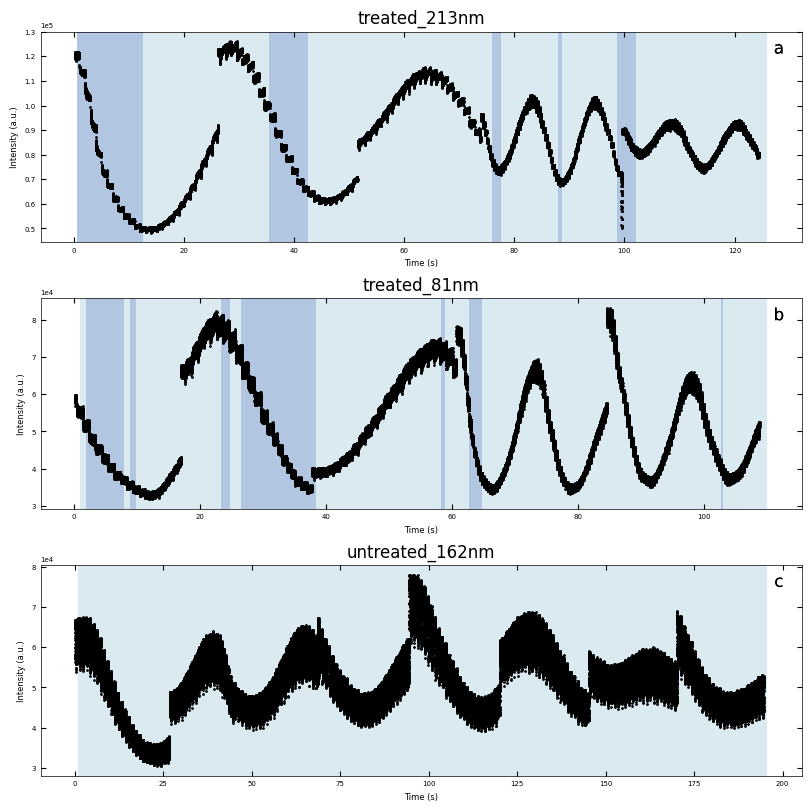

In [39]:
fig, axes = layout_fig(3, 1, figsize=(8, 8))
Viz.draw_background_colors(axes[0], color_array_sample1)

axes[0].scatter(x_all_sample1, y_all_sample1, color='k', s=1)
Viz.set_labels(axes[0], xlabel='Time (s)', ylabel='Intensity (a.u.)', title='treated_213nm')
labelfigs(axes[0], number=0, loc='tr', style='b', size=12, inset_fraction=(0.08, 0.03))

Viz.draw_background_colors(axes[1], color_array_sample2)
axes[1].scatter(x_all_sample2, y_all_sample2, color='k', s=1)
Viz.set_labels(axes[1], xlabel='Time (s)', ylabel='Intensity (a.u.)', title='treated_81nm')
labelfigs(axes[1], number=1, loc='tr', style='b', size=12, inset_fraction=(0.08, 0.03))

Viz.draw_background_colors(axes[2], color_array_sample3)
axes[2].scatter(x_all_sample3, y_all_sample3, color='k', s=1)
Viz.set_labels(axes[2], xlabel='Time (s)', ylabel='Intensity (a.u.)', title='untreated_162nm')
labelfigs(axes[2], number=2, loc='tr', style='b', size=12, inset_fraction=(0.08, 0.03))

# printing_plot.savefig(fig, 'fitting_results_clear', dpi=300)
plt.show()

Temporal evolution of RHEED intensity extracted from spot 2 region. RHEED intensity of deposition of a) treated_213nm, b) treated_81nm, and c) untreated_162nm, respectively. The medium and light background represents different fitting functions used to fit with the decay curves. Typical decay curves are provided on the corresponding background color. 

### 4.3 Align the time for better visualization of growth rate

In [40]:
y_all_sample1 = y_all_sample1[x_all_sample1<110]
x_all_sample1 = x_all_sample1[x_all_sample1<110]

x_coor = color_array_sample1[:, 0]
color_array_sample1 = color_array_sample1[x_coor<110]

y_all_sample2 = y_all_sample2[x_all_sample2<110]
x_all_sample2 = x_all_sample2[x_all_sample2<110]

x_coor = color_array_sample2[:, 0]
color_array_sample2 = color_array_sample2[x_coor<110]

y_all_sample3 = y_all_sample3[x_all_sample3<110]
x_all_sample3 = x_all_sample3[x_all_sample3<110]

x_coor = color_array_sample3[:, 0]
color_array_sample3 = color_array_sample3[x_coor<110]

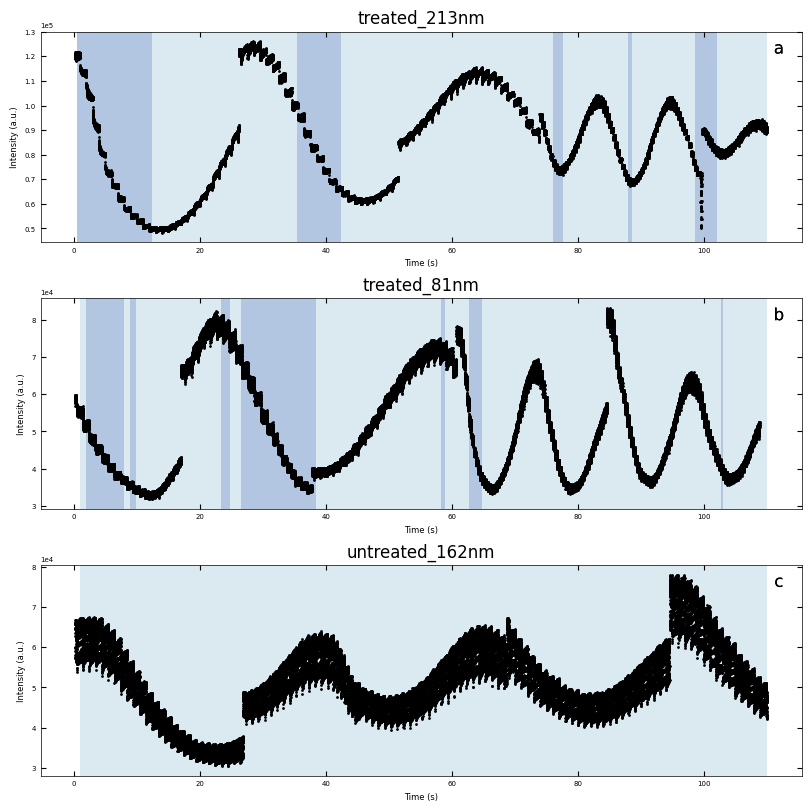

In [41]:
fig, axes = layout_fig(3, 1, figsize=(8, 8))
Viz.draw_background_colors(axes[0], color_array_sample1)

axes[0].scatter(x_all_sample1, y_all_sample1, color='k', s=1)
Viz.set_labels(axes[0], xlabel='Time (s)', ylabel='Intensity (a.u.)', title='treated_213nm')
labelfigs(axes[0], number=0, loc='tr', style='b', size=12, inset_fraction=(0.08, 0.03))
# axes[0].set_xlim(0, 115)

Viz.draw_background_colors(axes[1], color_array_sample2)
axes[1].scatter(x_all_sample2, y_all_sample2, color='k', s=1)
Viz.set_labels(axes[1], xlabel='Time (s)', ylabel='Intensity (a.u.)', title='treated_81nm')
labelfigs(axes[1], number=1, loc='tr', style='b', size=12, inset_fraction=(0.08, 0.03))

Viz.draw_background_colors(axes[2], color_array_sample3)
axes[2].scatter(x_all_sample3, y_all_sample3, color='k', s=1)
Viz.set_labels(axes[2], xlabel='Time (s)', ylabel='Intensity (a.u.)', title='untreated_162nm')
labelfigs(axes[2], number=2, loc='tr', style='b', size=12, inset_fraction=(0.08, 0.03))

# printing_plot.savefig(fig, 'fitting_results_clear', dpi=300)
plt.show()